In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import numpy as np

In [2]:
df= pd.read_csv("ola_driver_scaler.csv")

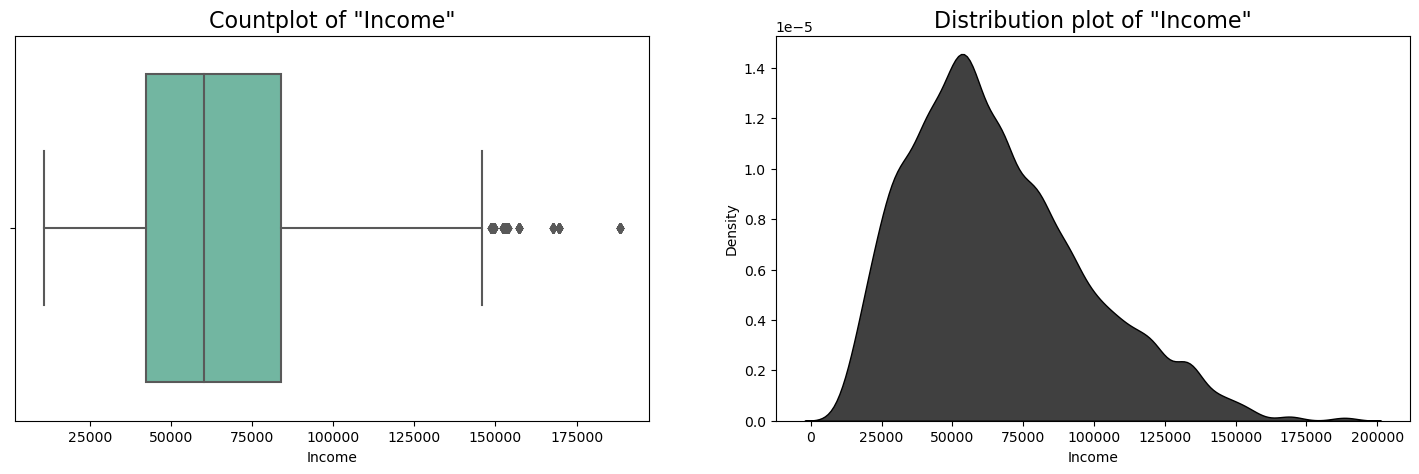

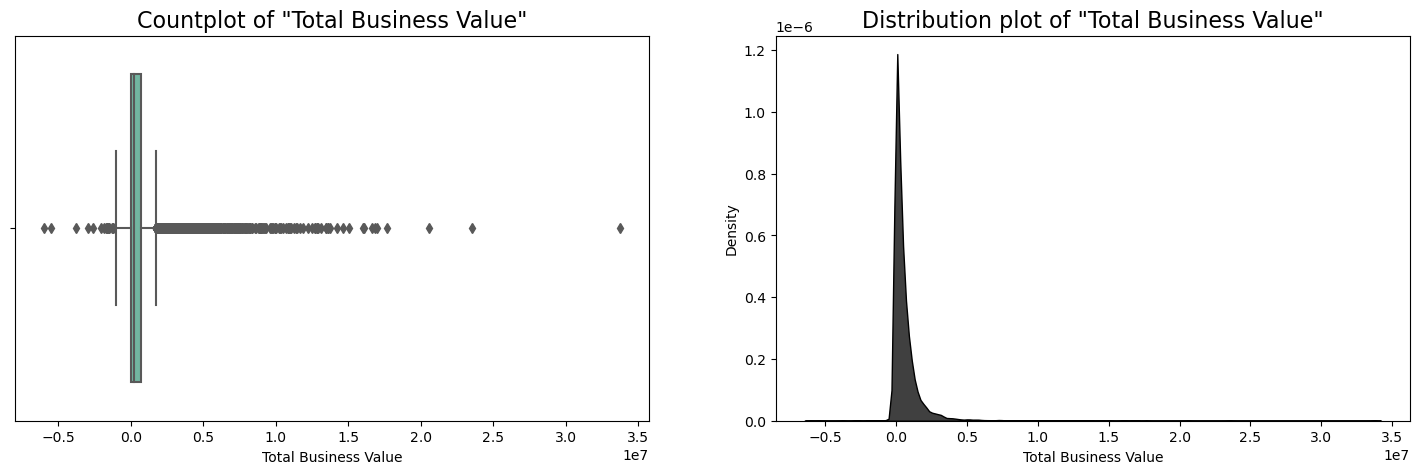

In [3]:
number_cols = ['Income','Total Business Value']
for i in number_cols:
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[i], palette='Set2')
    plt.title(f'Countplot of "{i}"', fontsize=16)

    plt.subplot(1, 2, 2)
    sns.kdeplot(x=df[i],multiple='stack',color='black')
    plt.title(f'Distribution plot of "{i}"', fontsize=16)
    plt.show()

# `JOHN TUKEY'S WAY(IQR METHOD) ;)`

In [4]:
df1 = df.copy(deep=True)

In [5]:
def remove_outliers_tukey(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series >= lower_bound) & (series <= upper_bound)]

In [6]:
df1['Income'] = remove_outliers_tukey(df1['Income'])

In [7]:
df1['Total Business Value'] = remove_outliers_tukey(df1['Total Business Value'])


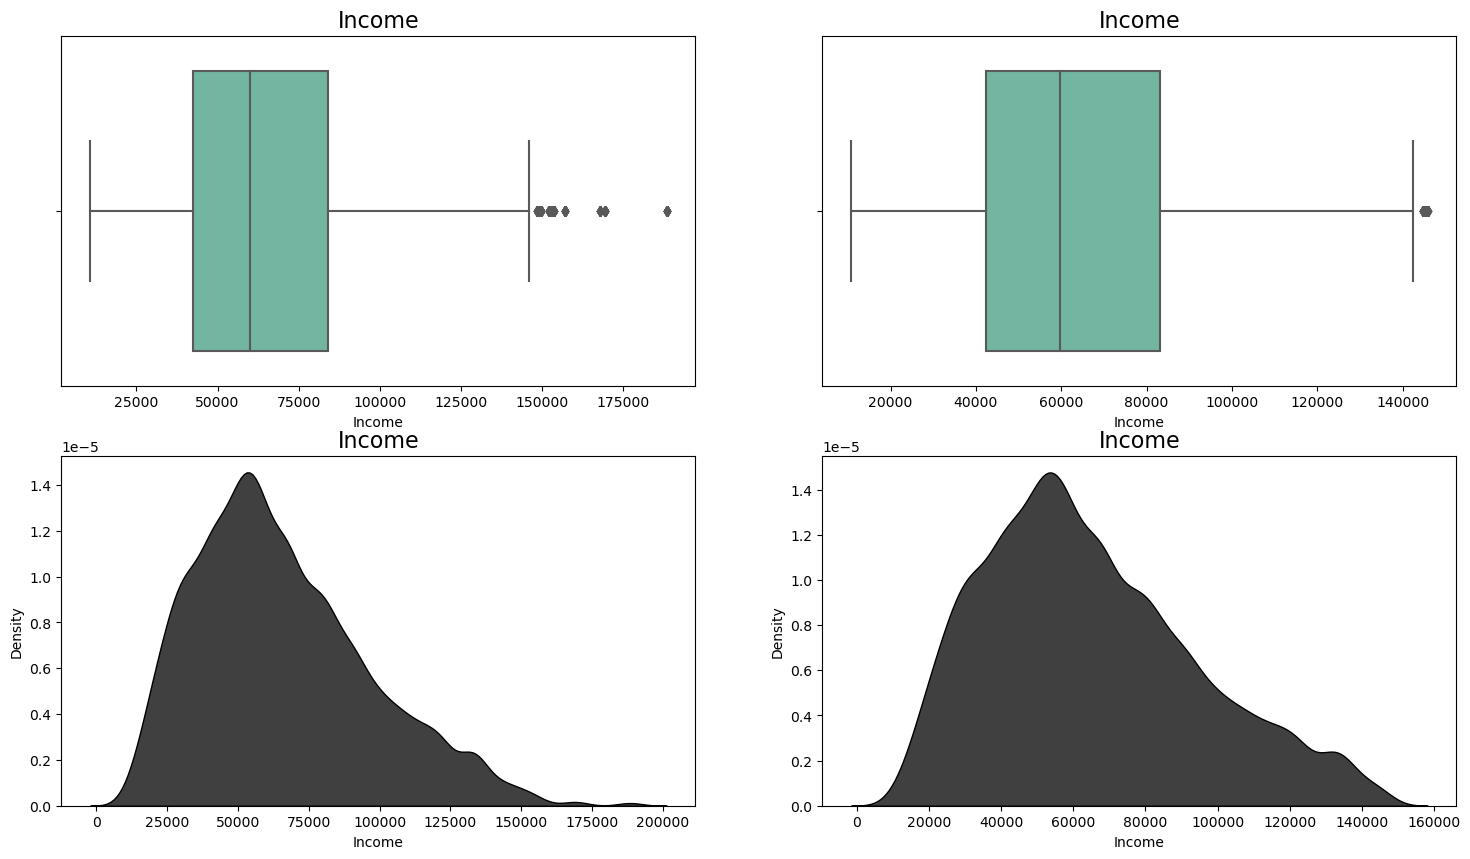

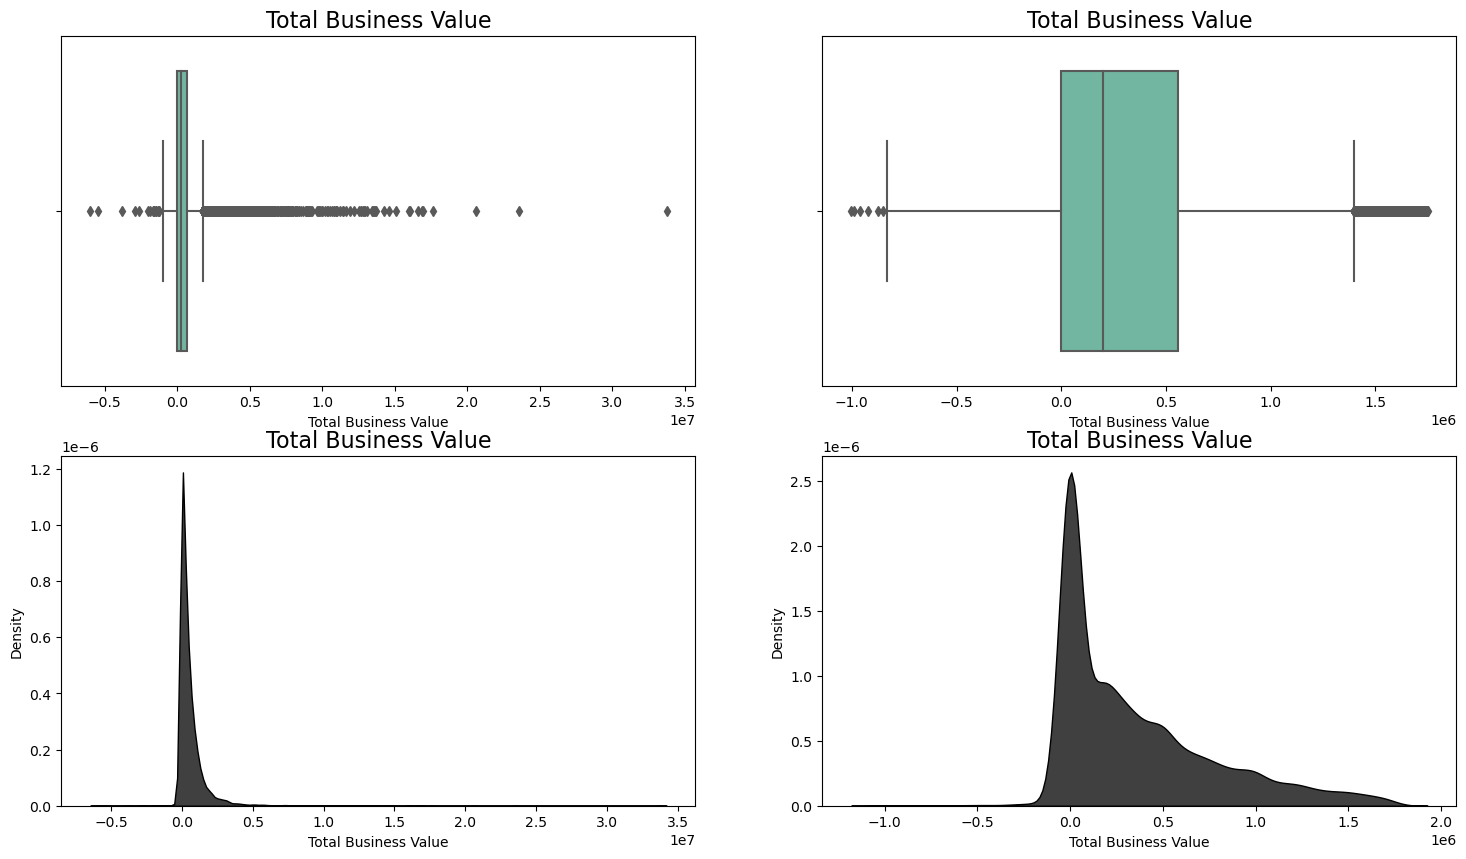

In [8]:
number_cols = ['Income','Total Business Value']
for i in number_cols:
    plt.figure(figsize=(18, 10))
    plt.subplot(2, 2, 1)
    sns.boxplot(x=df[i], palette='Set2')
    plt.title(f'{i}', fontsize=16)

    plt.subplot(2, 2, 2)
    sns.boxplot(x=df1[i],palette='Set2')
    plt.title(f'{i}', fontsize=16)

    plt.subplot(2, 2, 3)
    sns.kdeplot(x=df[i],multiple='stack',color='black')
    plt.title(f'{i}', fontsize=16)

    plt.subplot(2, 2, 4)
    sns.kdeplot(x=df1[i],multiple='stack',color='black')
    plt.title(f'{i}', fontsize=16)
    plt.show()

# `WINSORIZING:0`

In [9]:
df2= df.copy(deep=True)

In [10]:
def winsorize_series(series, lower_quantile=0.05, upper_quantile=0.90):
    lower_bound = series.quantile(lower_quantile)
    upper_bound = series.quantile(upper_quantile)
    return series.clip(lower=lower_bound, upper=upper_bound)


In [11]:
# Winsorizing the 'Income' column
df2['Income'] = winsorize_series(df2['Income'])

# Winsorizing the 'Total Business Values' column
df2['Total Business Value'] = winsorize_series(df2['Total Business Value'])

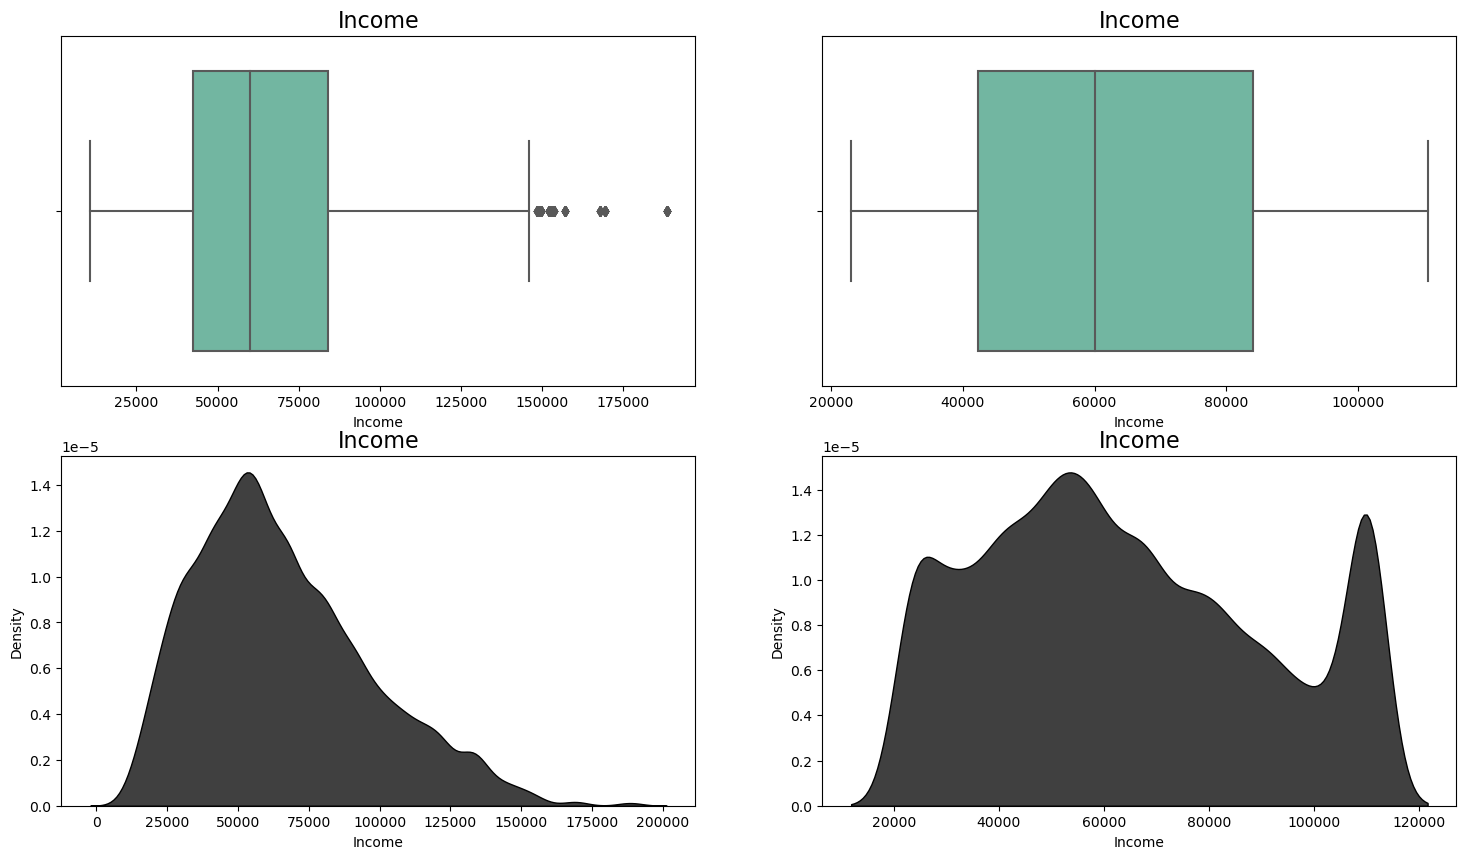

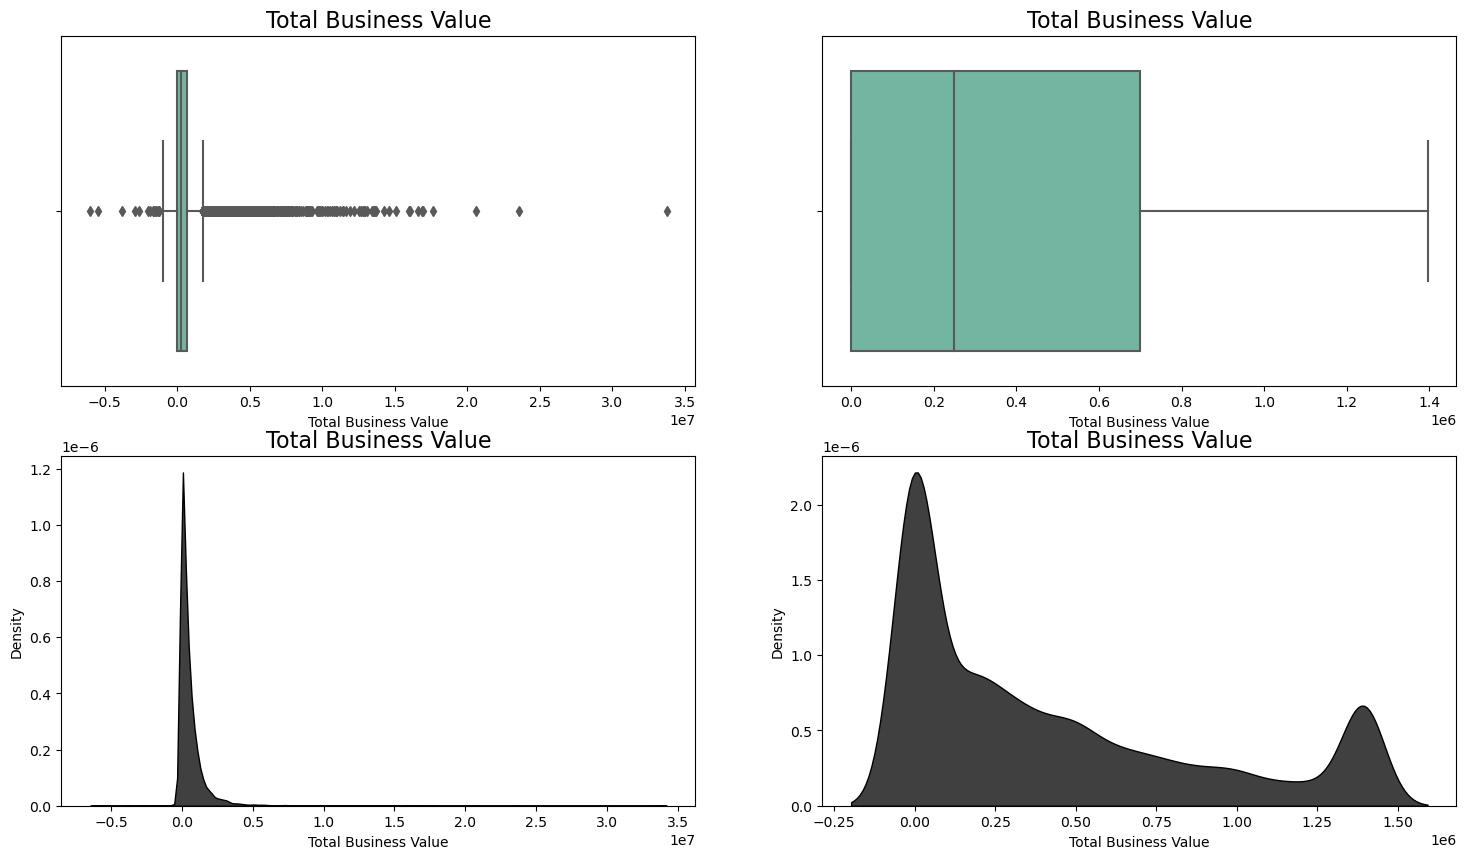

In [12]:
number_cols = ['Income','Total Business Value']
for i in number_cols:
    plt.figure(figsize=(18, 10))
    plt.subplot(2, 2, 1)
    sns.boxplot(x=df[i], palette='Set2')
    plt.title(f'{i}', fontsize=16)

    plt.subplot(2, 2, 2)
    sns.boxplot(x=df2[i],palette='Set2')
    plt.title(f'{i}', fontsize=16)

    plt.subplot(2, 2, 3)
    sns.kdeplot(x=df[i],multiple='stack',color='black')
    plt.title(f'{i}', fontsize=16)

    plt.subplot(2, 2, 4)
    sns.kdeplot(x=df2[i],multiple='stack',color='black')
    plt.title(f'{i}', fontsize=16)
    plt.show()

**Reduced Spread:**

- Outliers Mitigation: By replacing extreme values with the nearest threshold values, Winsorizing reduces the overall spread of the data.
- Less Variability: The range (difference between maximum and minimum values) is decreased, which can reduce the standard deviation and variance.

**Distribution Shape:**

- Tail Truncation: Winsorizing truncates the tails of the distribution, making the data appear more normally distributed if it initially had heavy tails.
- Symmetry: If applied symmetrically to both tails, the distribution can become more symmetric.

**Central Tendency:**

- Mean and Median: Winsorizing can affect the mean more than the median, especially if the dataset had extreme outliers.
- Shifted Mean: The mean may shift closer to the median because extreme values that disproportionately affect the mean are adjusted.

**Data Integrity:**

- Preserved Rows: Although all data points remain in the dataset, the integrity of individual data points is altered since extreme values are capped.

**Notes:**
- One advantage of Winsorizing is that there is no collateral damage. You can Winsorize outliers for every feature of a 2,000-column dataset without dropping a single row.
- Since Winsorizing reduces the weight of outliers without eliminating them, the former outliers still have influence in models or statistical calculations. 
**https://ndgigliotti.medium.com/trimming-vs-winsorizing-outliers-e5cae0bf22cb**

# `PERCENTILE:|`

In [13]:
df3 = df.copy(deep=True)

In [14]:
def remove_outliers_percentile(series, lower_percentile=5, upper_percentile=95):
    lower_bound = np.percentile(series, lower_percentile)
    upper_bound = np.percentile(series, upper_percentile)
    return series[(series >= lower_bound) & (series <= upper_bound)]

In [15]:
# Remove outliers from the 'Income' column using percentiles
df3['Income'] = remove_outliers_percentile(df3['Income'])

# Remove outliers from the 'Total Business Values' column using percentiles
df3['Total Business Value'] = remove_outliers_percentile(df3['Total Business Value'])

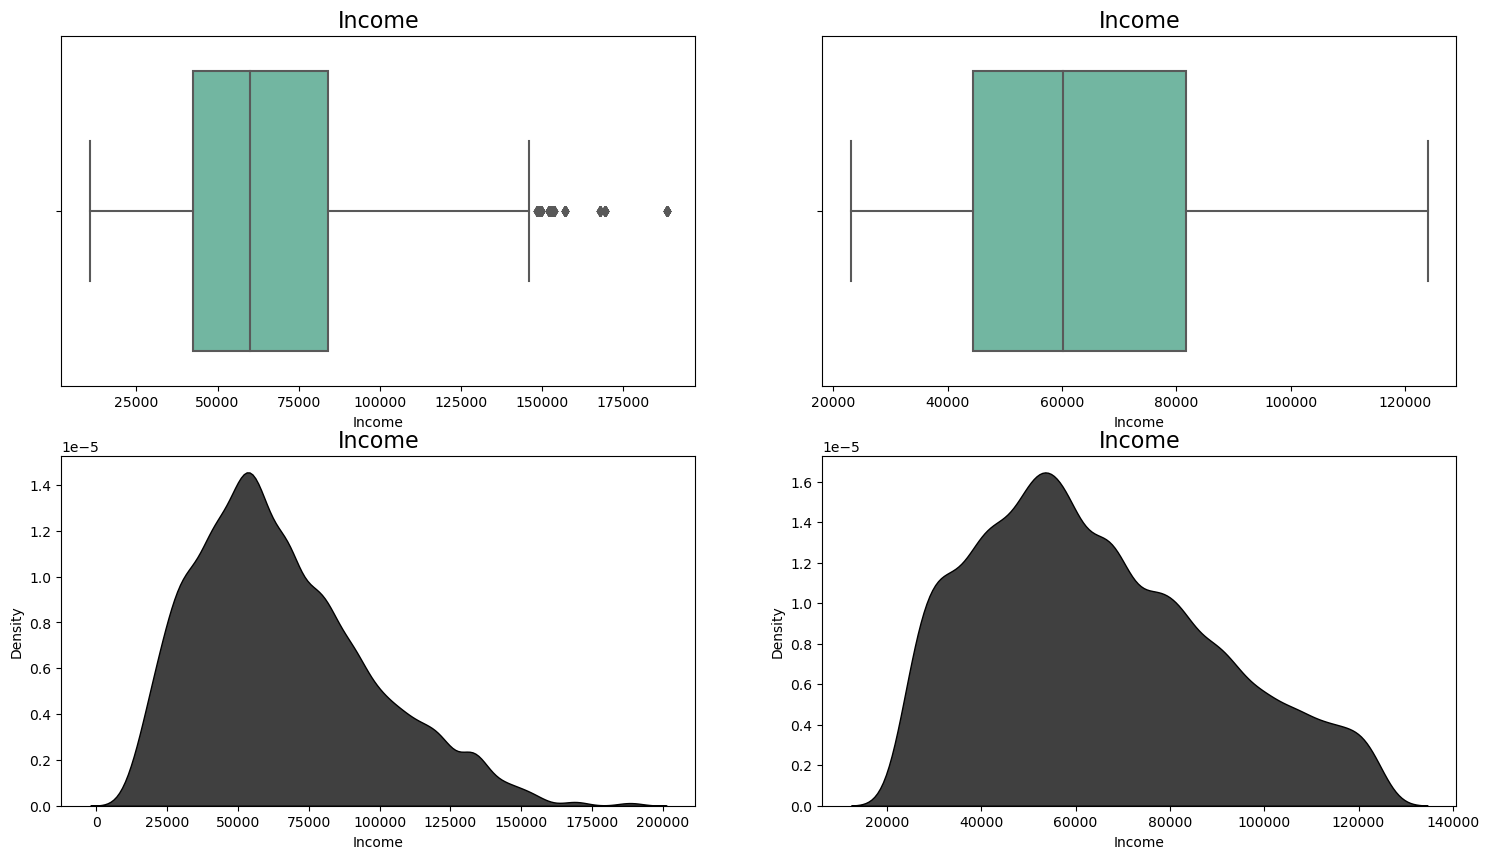

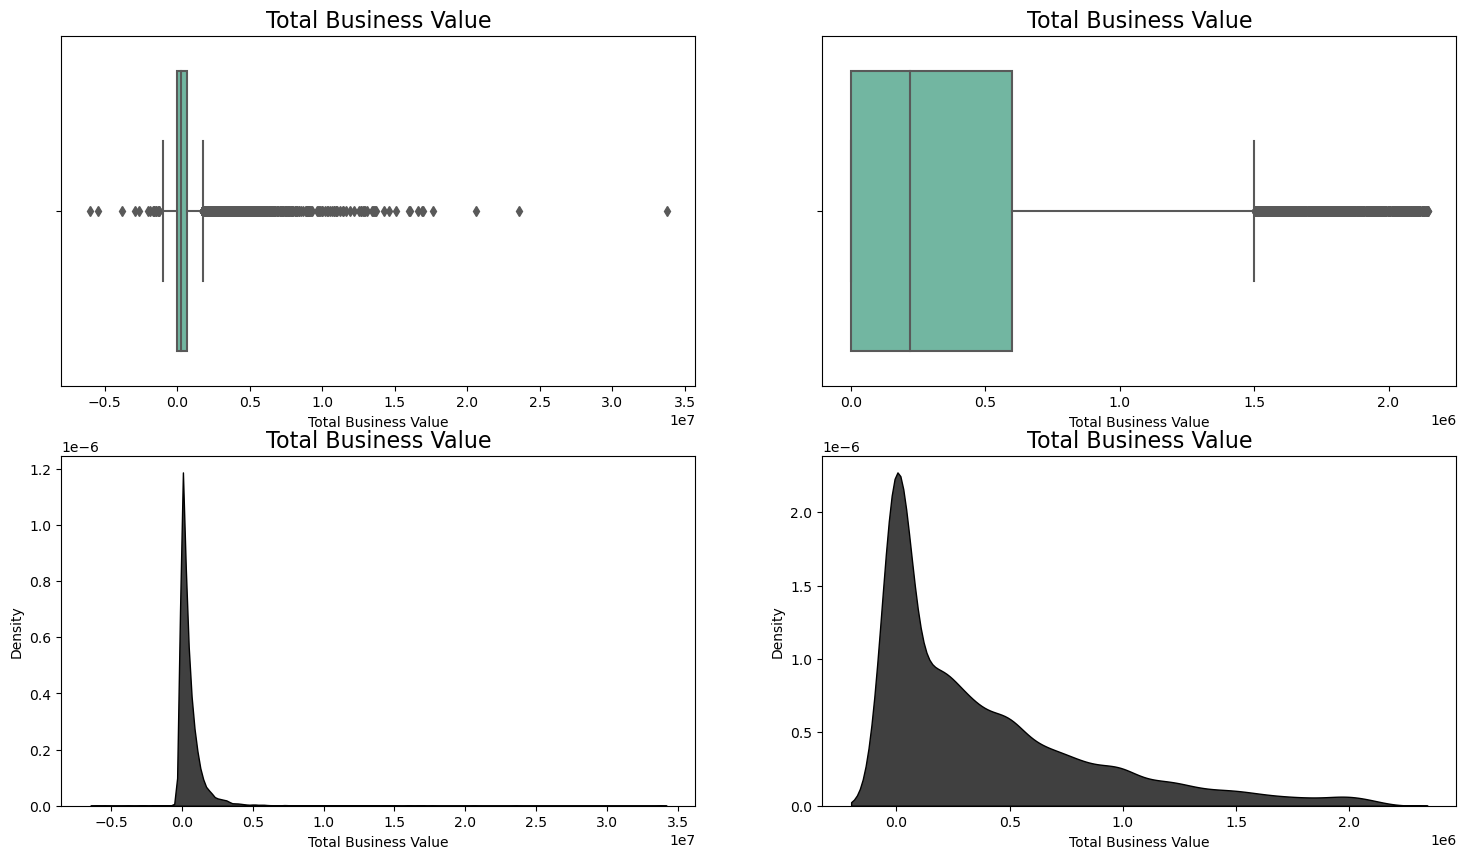

In [16]:
number_cols = ['Income','Total Business Value']
for i in number_cols:
    plt.figure(figsize=(18, 10))
    plt.subplot(2, 2, 1)
    sns.boxplot(x=df[i], palette='Set2')
    plt.title(f'{i}', fontsize=16)

    plt.subplot(2, 2, 2)
    sns.boxplot(x=df3[i],palette='Set2')
    plt.title(f'{i}', fontsize=16)

    plt.subplot(2, 2, 3)
    sns.kdeplot(x=df[i],multiple='stack',color='black')
    plt.title(f'{i}', fontsize=16)

    plt.subplot(2, 2, 4)
    sns.kdeplot(x=df3[i],multiple='stack',color='black')
    plt.title(f'{i}', fontsize=16)
    plt.show()

**Understanding the Problem:**

- Data Filtering: When you use percentiles to remove outliers, you set thresholds based on percentile values (e.g., 5th and 95th percentiles). Any data points outside these bounds are removed.

- Resulting Dataset: If all data points in a column fall outside the specified percentiles, the column ends up empty after filtering. This results in the statistics becoming NaN because there are no values left to calculate these metrics.

**Possible Reasons:**

- Inappropriate Percentiles: If the percentiles chosen are too restrictive (e.g., setting lower_percentile = 5 and upper_percentile = 95 might remove nearly all data points), then the resulting dataset could be empty.
- Data Distribution: If the original data distribution is skewed or has a narrow range, applying strict percentile-based filtering might inadvertently remove all or most of the data.

**Threshold Calculation:**

- Percentile-based outlier removal involves calculating percentile values (e.g., 5th percentile and 95th percentile) for each column in the dataset.

**Filtering Process:**

- For each column, identify the lower and upper bounds based on the chosen percentiles.
Exclude or replace data points that lie outside these bounds with NaNs or filter them out from further analysis.

**Data Preservation:**

- The key advantage of percentile-based methods is that they retain the structure of the dataset, including all rows and columns.
- Only individual data points that exceed the specified percentile thresholds are adjusted or marked as outliers.

*******************************************************************************************************************************


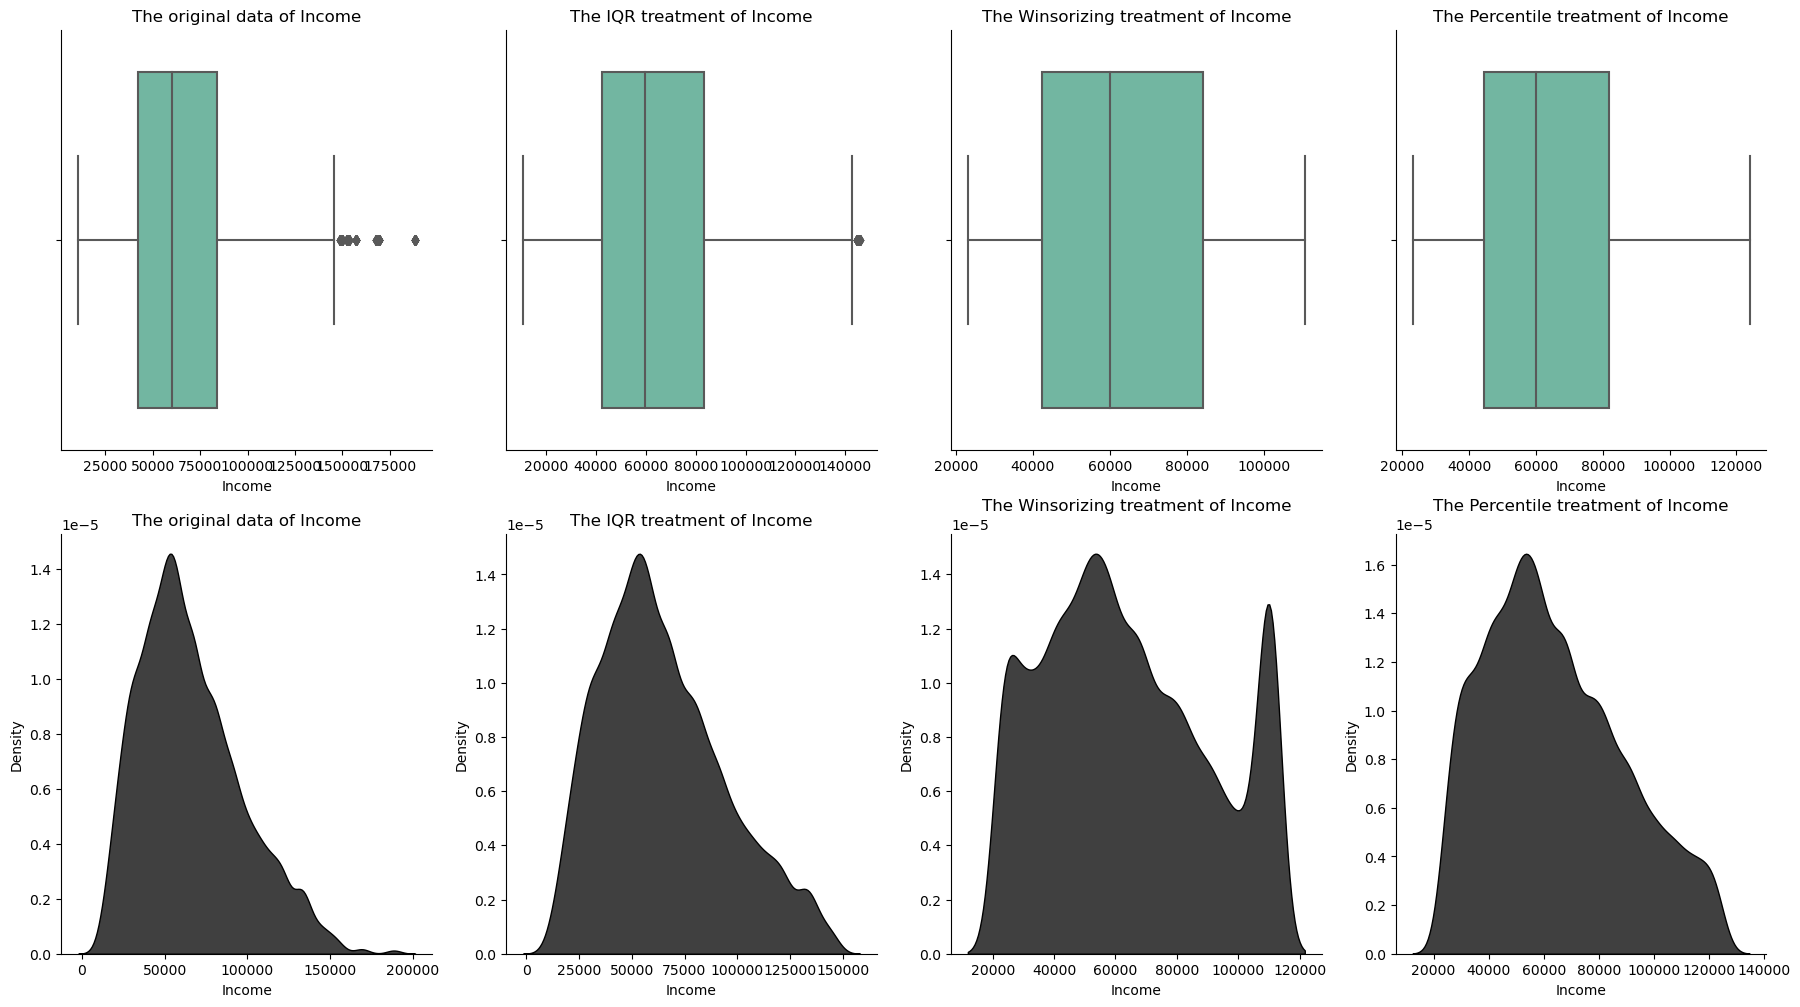

*******************************************************************************************************************************


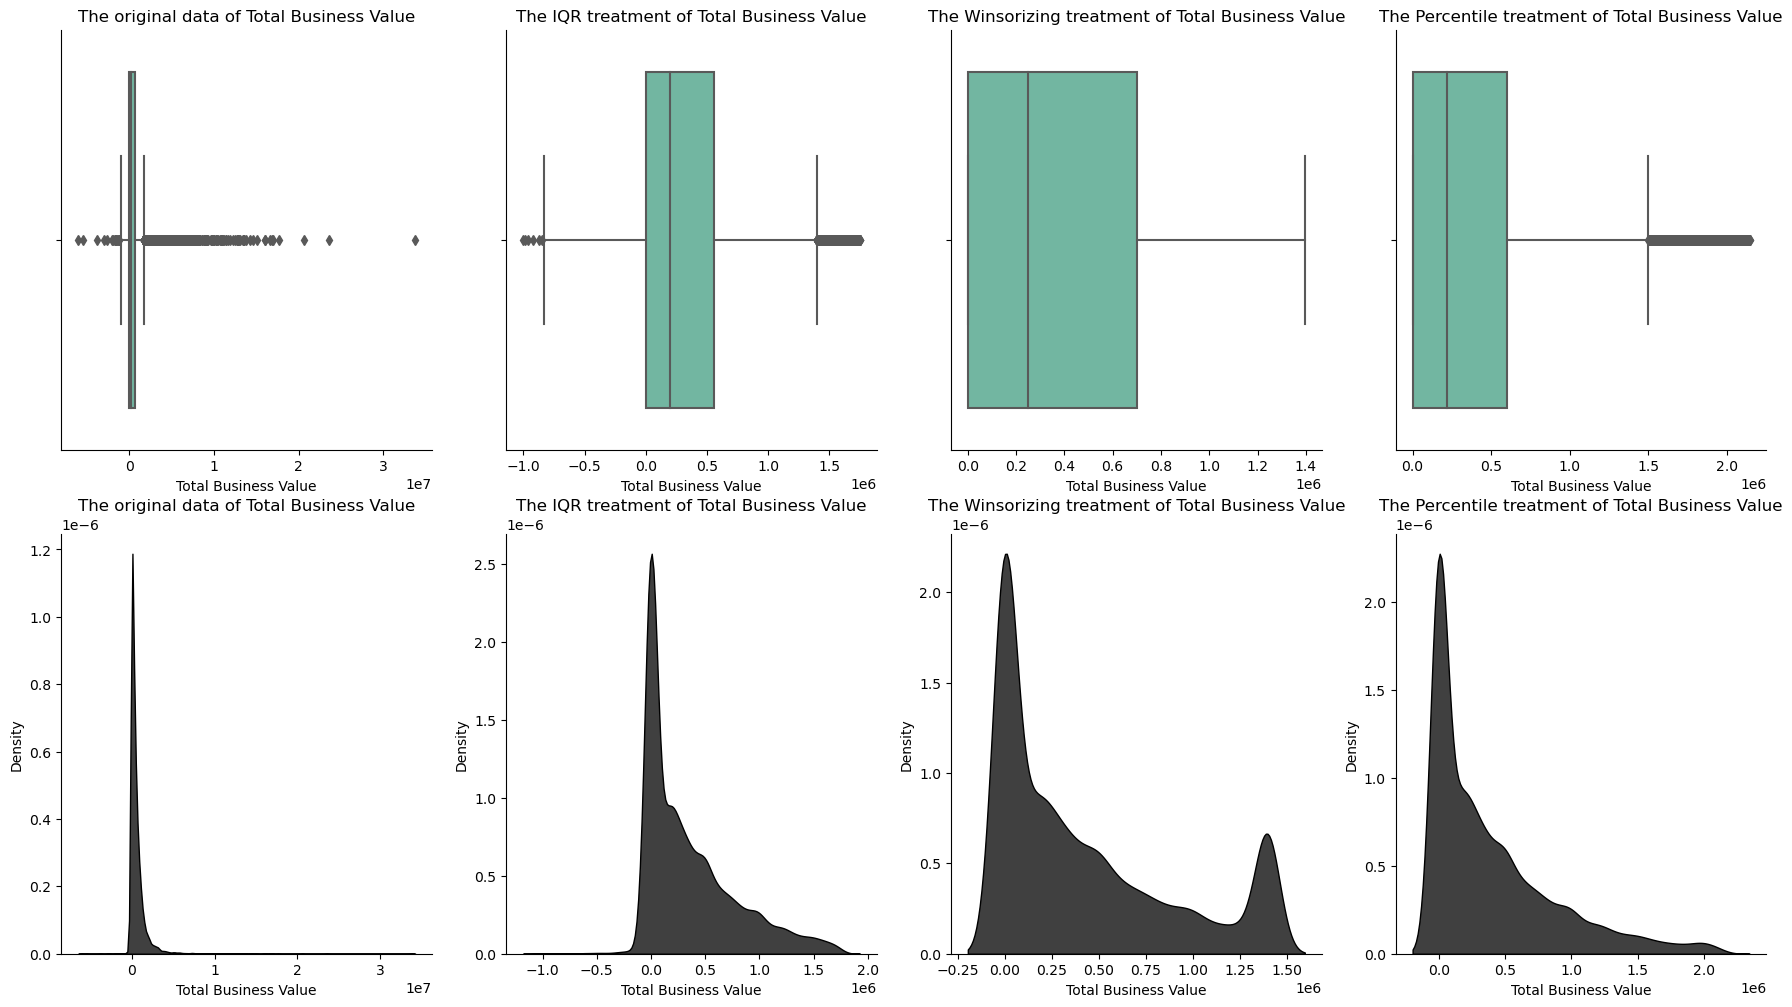

In [17]:
cols = ['Income', 'Total Business Value']
for i in cols:
    plt.figure(figsize=(22,12))
    
    # Plotting boxplots
    plt.subplot(2, 4, 1)
    sns.boxplot(x=df[i], palette='Set2')
    plt.title(f"The original data of {i}")

    plt.subplot(2, 4, 2)
    sns.boxplot(x=df1[i], palette='Set2')
    plt.title(f"The IQR treatment of {i}")

    plt.subplot(2, 4, 3)
    sns.boxplot(x=df2[i], palette='Set2')
    plt.title(f"The Winsorizing treatment of {i}")

    plt.subplot(2, 4, 4)
    sns.boxplot(x=df3[i], palette='Set2')
    plt.title(f"The Percentile treatment of {i}")

    # Plotting KDE plots
    plt.subplot(2, 4, 5)
    sns.kdeplot(x=df[i], multiple='stack', color='black')
    plt.title(f"The original data of {i}")

    plt.subplot(2, 4, 6)
    sns.kdeplot(x=df1[i], multiple='stack', color='black')
    plt.title(f"The IQR treatment of {i}")

    plt.subplot(2, 4, 7)
    sns.kdeplot(x=df2[i], multiple='stack', color='black')
    plt.title(f"The Winsorizing treatment of {i}")

    plt.subplot(2, 4, 8)
    sns.kdeplot(x=df3[i], multiple='stack', color='black')
    plt.title(f"The Percentile treatment of {i}")

    print("*" * 127)
    sns.despine()
    plt.show()


### `Winsorizing Outliers`

**How It Works:**

- Winsorizing transforms extreme values to a specified percentile value rather than removing them.
- For example, if you Winsorize a dataset at the 5th and 95th percentiles, any values below the 5th percentile are set to the 5th percentile value, and any values above the 95th percentile are set to the 95th percentile value.

**Effect on Data:**

- The extreme values are “clipped” to the boundary values (the chosen percentiles).
- This can create a "pile-up" of values at the new boundaries, resulting in a visible tail or plateau in the distribution.

### `Percentile Outlier Removal`

**How It Works:**

- Percentile-based outlier removal filters out data points outside the specified percentile range.
- For example, removing data points below the 5th percentile and above the 95th percentile.

**Effect on Data:**

- The extreme values are completely removed from the dataset.
- This truncates the distribution, eliminating the extreme values rather than transforming them.

### `Visual Explanation`

- Winsorizing Tail: The tail appears because extreme values are not removed but are capped at a certain value. This means many values get pushed to the boundaries, creating a concentration of values at those boundaries. Hence, you see a tail at the end of the distribution.
- Percentile Treatment: By removing the extreme values, the dataset is truncated. This truncation means no values are present beyond the specified percentiles, leading to a sharper cutoff in the distribution without a tail.